In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

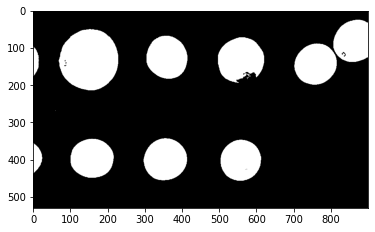

In [3]:
# Load the image
img = cv.imread("3.bmp")
copy_img = img.copy()
# Convert the image to the HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for orange and green in the HSV space
lower_orange_and_green = np.array([10, 50, 50])
upper_orange_and_green = np.array([50, 255, 255])

# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange_and_green, upper_orange_and_green)
plt.imshow(mask,cmap='gray')
plt.show

In [4]:
# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


In [5]:
h,w,ch = img.shape

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)    


result = cv.bitwise_and(copy_img, copy_img, mask=mask)

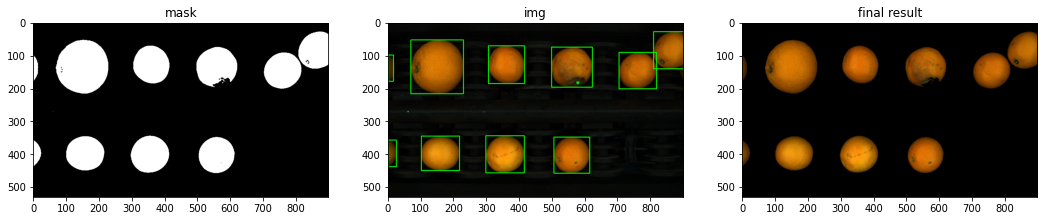

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(mask,cmap='gray')
plt.title("mask")
plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("img")
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("final result")
plt.show(block=True)

### Orange radius 

In [7]:
result_copy =result.copy()

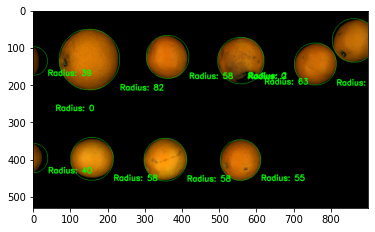

In [8]:
for cnt in contours:
    center, radius = cv.minEnclosingCircle(cnt)
    center = (int(center[0]), int(center[1]))
    radius = int(radius)
#     radius_cm = radius_px * conversion_factor # to convert from pixal to cm
    cv.circle(result_copy, center, radius, (0, 255, 0))
    cv.putText(result_copy, f"Radius: {radius}", (center[0]+radius, center[1]+radius), 
               cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    

plt.imshow(cv.cvtColor(result_copy, cv.COLOR_BGR2RGB))
plt.show(block=True)